<br><br><h1 align="center"> 📌 Insurance Cost Analysis & Prediction  📈</h1>
<h3 align="right"> </h3><br><br>

## Project Objectives 

In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 

### Setup

For this lab, we will beusing the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


In [ ]:

# The following libraries are not pre-installed in jupyter notebook. You will need to run the following cell to install them


In [12]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [1]:

# Importing Required Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [ ]:
                                                          LOADING THE DATASET FROM MY LOCAL SYSTEM

In [26]:
import pandas as pd

# Storing it in df variable

mydata = pd.read_csv('C:/Users/rames/Downloads/medical_insurance_dataset.csv')
mydata


,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86180
2767,21,1,34.600,0,0,3,2020.17700
2768,19,2,26.030,1,1,1,16450.89470
2769,23,2,18.715,0,0,1,21595.38229


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,2771.0,1.507398,0.500036,1.0000,1.000,2.0000,2.000000,2.00000
bmi,2771.0,30.702360,6.130324,15.9600,26.220,30.4950,34.770000,53.13000
no_of_children,2771.0,1.102129,1.214845,0.0000,0.000,1.0000,2.000000,5.00000
region,2771.0,2.559726,1.130934,1.0000,2.000,3.0000,4.000000,4.00000
charges,2771.0,13260.062289,12153.767132,1121.8739,4687.797,9304.7019,16516.743675,63770.42801


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [29]:
df.isnull().sum()

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

### Task 1 : there are currently no headers in the CSV file check and assign the headings. 


In [19]:

df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [22]:
df.columns = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.head(8)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,2771.0,1.507398,0.500036,1.0000,1.000,2.0000,2.000000,2.00000
bmi,2771.0,30.702360,6.130324,15.9600,26.220,30.4950,34.770000,53.13000
no_of_children,2771.0,1.102129,1.214845,0.0000,0.000,1.0000,2.000000,5.00000
region,2771.0,2.559726,1.130934,1.0000,2.000,3.0000,4.000000,4.00000
charges,2771.0,13260.062289,12153.767132,1121.8739,4687.797,9304.7019,16516.743675,63770.42801


In [53]:
df.reset_index()

,index,age,gender,bmi,no_of_children,smoker,region,charges
0,0,18,2,33.770,1,0,4,1725.55
1,1,28,2,33.000,3,0,4,4449.46
2,2,33,2,22.705,0,0,1,21984.47
3,3,32,2,28.880,0,0,1,3866.86
4,4,31,1,25.740,0,0,4,3756.62
...,...,...,...,...,...,...,...,...
2766,2766,47,1,45.320,1,0,4,8569.86
2767,2767,21,1,34.600,0,0,3,2020.18
2768,2768,19,2,26.030,1,1,1,16450.89
2769,2769,23,2,18.715,0,0,1,21595.38


### Task 2: Check and Replace the Null values entries with values.


In [23]:
df.replace("?", np.nan, inplace=True)
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


## Task 3 : Data Wrangling


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [25]:
df.isnull().sum()

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

In [30]:

# find all the indexes where age is NaN so we can check if it's replaced later


age_nans = df[np.isnan(df["age"].astype(float))].index

                                                          # get the mean for age
age_mean = round(df["age"].astype(float).mean())
                                                         # replace the missing ages with the average
df["age"] = df["age"].replace(np.nan, age_mean)
                                                        # change age to int since it won't have decimal values 
df["age"] = df["age"].astype(int)
                                                          # check the missing values
df["age"].iloc[age_nans]

233     39
1835    39
2179    39
2663    39
Name: age, dtype: int32

In [31]:
# find all the indexes where smoker is NaN so we can check if it's replaced later

smoke_nans = df[np.isnan(df["smoker"].astype(float))].index
                                                                   # get the mode for smoker
smoke_mode = df["smoker"].value_counts().idxmax()
                                                                # replace the missing smoker values with the mode
df["smoker"] = df["smoker"].replace(np.nan, smoke_mode)
                                                                   # change smoker to int since it won't have decimal values 
df["smoker"] = df["smoker"].astype(int)
                                                                # check the missing values
df["smoker"].iloc[smoke_nans]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


In [32]:
df["charges"] = df["charges"].round(2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


In [34]:
df['age'].isnull().sum()

0

In [35]:
df['smoker'].isnull().sum()

0

In [36]:
df['region'].isnull().sum()

0

In [37]:
df['charges'].isnull().sum()

0

In [39]:
df.isnull().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

In [41]:
df.dropna()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86
2767,21,1,34.600,0,0,3,2020.18
2768,19,2,26.030,1,1,1,16450.89
2769,23,2,18.715,0,0,1,21595.38


In [ ]:
Now Data is Cleaned

### Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


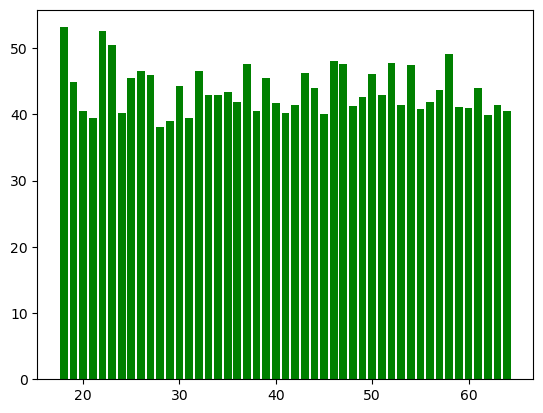

In [59]:
x = df['age']
y = df['bmi']

plt.bar(x,y, color = 'green')
plt.show()

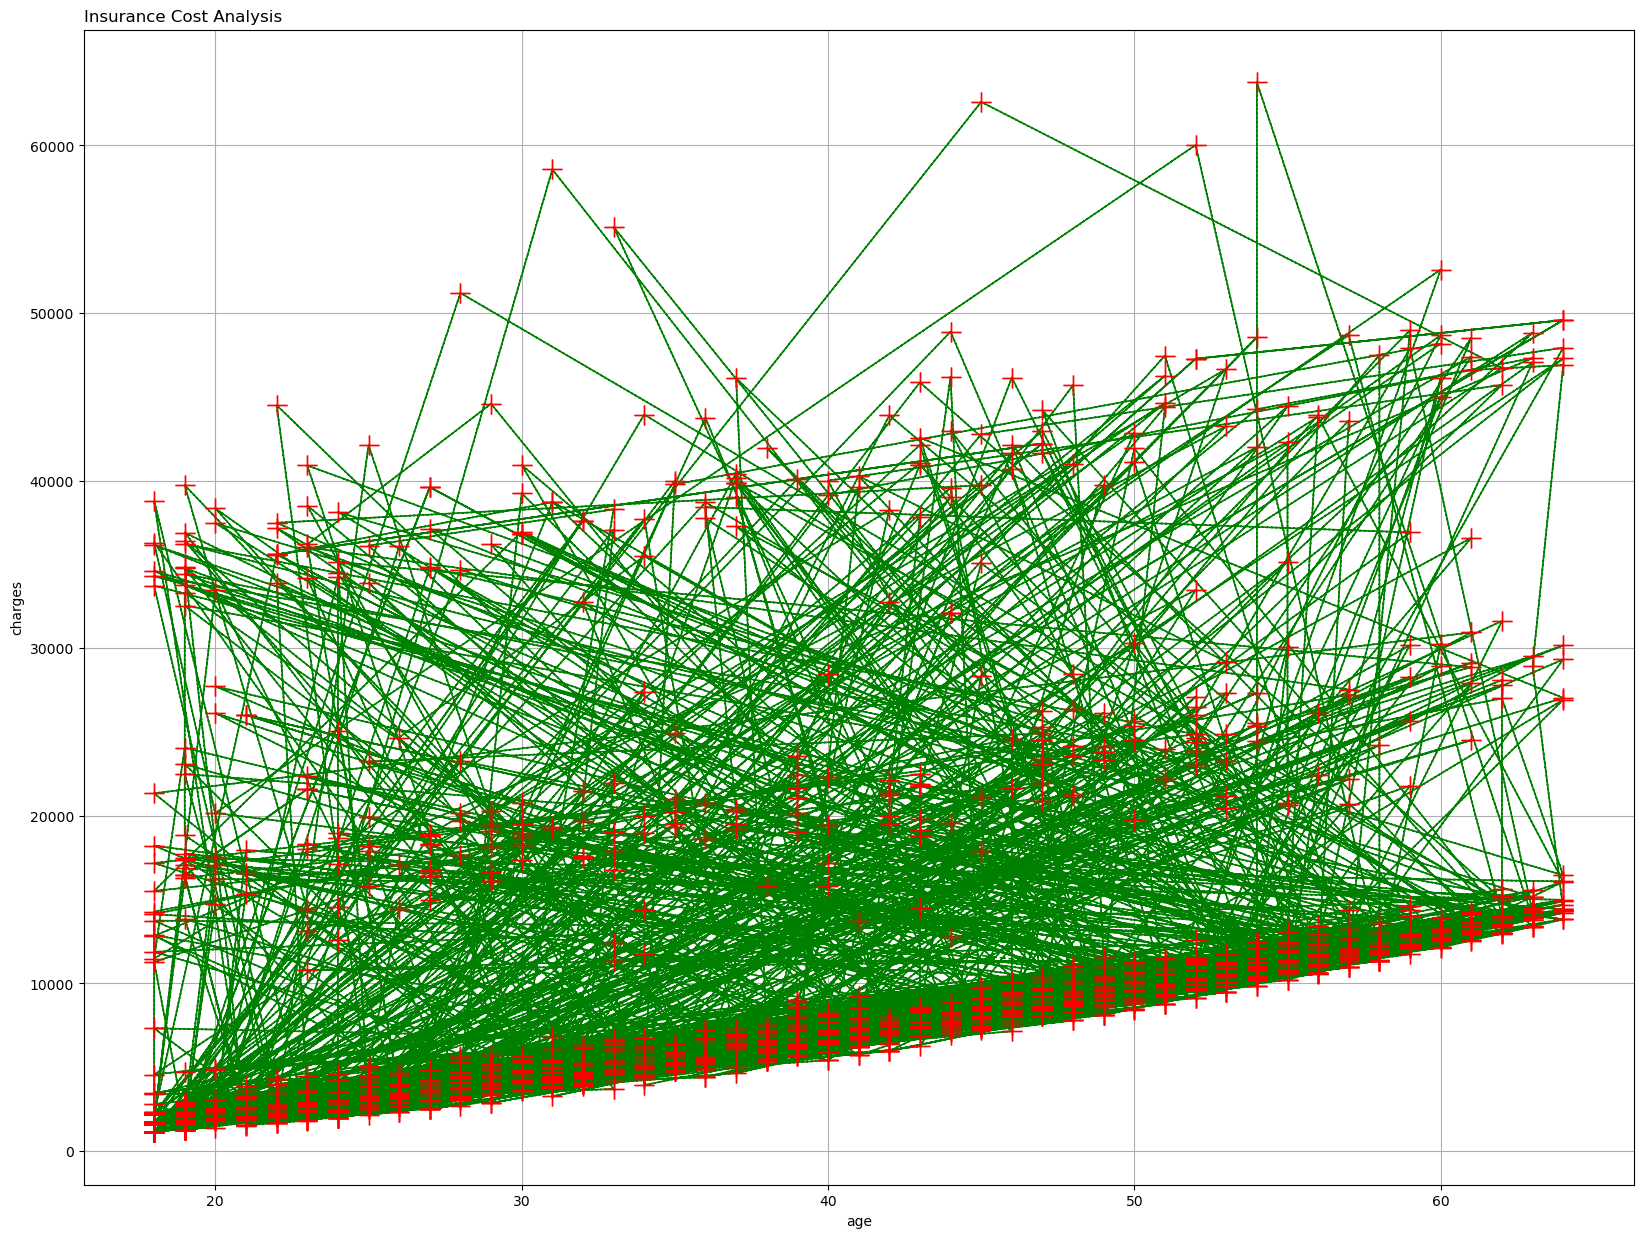

In [63]:
import matplotlib.pyplot as plt
import numpy as np

x = df['age']
y = df['charges']
plt.figure(figsize =(20,15))

plt.title("Insurance Cost Analysis", loc = 'left')

plt.xlabel("age")
plt.ylabel("charges")

plt.plot(x, y, marker = '+', ms = 14, mfc = 'b', mec = 'r', lw = '1.2', c = 'g', ls = 'dashed')
plt.grid()
plt.show()

In [64]:
df.head(2)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.77,1,0,4,1725.55
1,28,2,33.00,3,0,4,4449.46


In [66]:
df.shape

(2771, 7)

In [69]:
d = df['no_of_children'].unique()
d

array([1, 3, 0, 2, 5, 4], dtype=int64)

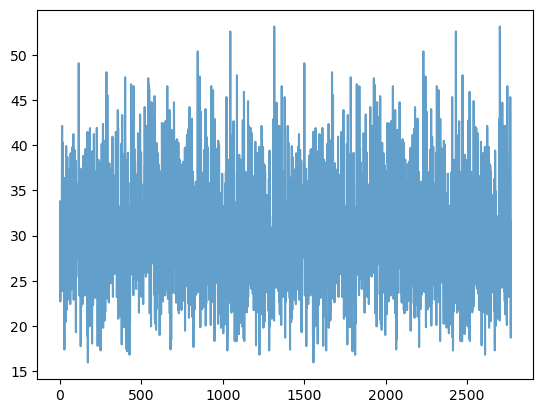

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import random

x =df['bmi']

plt.plot(x, alpha=0.7)

plt.show()

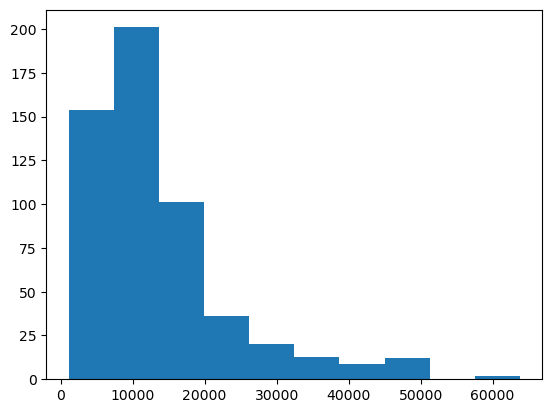

In [77]:
x = df.groupby('bmi')['charges'].mean()

plt.hist(x)
plt.show()

<Axes: xlabel='bmi', ylabel='charges'>

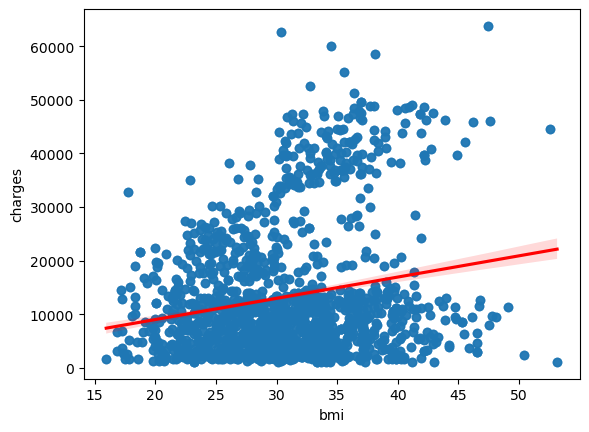

In [42]:
sns.regplot(x = 'bmi',y = 'charges',data= df, line_kws={"color": "red"})

Implement the box plot for `charges` with respect to `smoker`.


C:\Users\woake\AppData\Local\Temp\ipykernel_4824\4159523366.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  smoke_charge_box.set_xticklabels(new_labels)


[Text(0, 0, 'Non-smoker'), Text(1, 0, 'Smoker')]

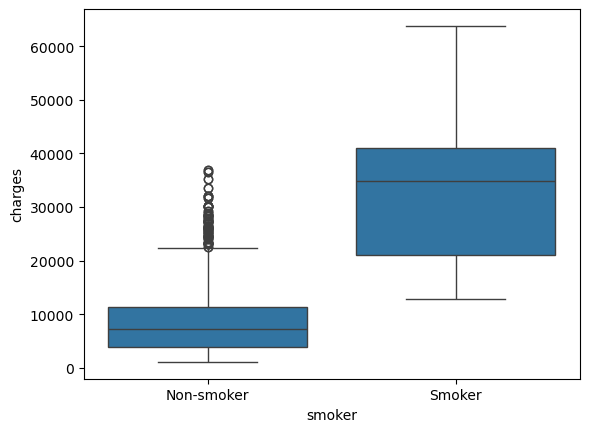

In [43]:

smoke_charge_box = sns.boxplot(x="smoker", y="charges", data=df)

x_labels = smoke_charge_box.get_xticklabels()

# change the current label if 1 to Smoker else to non-smoker

new_labels = ["Smoker" if label.get_text() == "1" else "Non-smoker" for label in x_labels]

# new labels 
smoke_charge_box.set_xticklabels(new_labels)

Print the correlation matrix for the dataset.


In [44]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


###  Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [46]:
lm = LinearRegression()
Y = df["charges"]
X = df[["smoker"]]
lm.fit(X, Y)
lm.score(X, Y)

0.6227430402464125

### Task 4 : Model Development
Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [47]:
Z = df.drop("charges", axis = 1)
lm.fit(Z, Y)
lm.score(Z, Y)

0.7505888664568174

Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [49]:
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z, Y)
pipe.score(Z, Y)

0.845371903154778

### Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [50]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=0)

Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [51]:
rm = Ridge(alpha=0.1)
rm.fit(x_train, y_train)
rm.score(x_test, y_test)

0.7564820031628499

Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [52]:
pf=PolynomialFeatures(degree=2, include_bias=False)
x_train_poly=pf.fit_transform(x_train)
x_test_poly=pf.fit_transform(x_test)
rm.fit(x_train_poly, y_train)
rm.score(x_test_poly, y_test)

0.8536751831575975

<br><br> 

<h2 align="center">Thank You</h2>

<br><br> 